# Revisitando Python Cientifico

<img src="https://cdn.lynda.com/course/550457/550457-637286206187260688-16x9.jpg" alt="pyscience_intro" style="width:700px;height:320px;">

Fuente: [Lynda.com](https://www.lynda.com/Python-tutorials/Data-Science-Foundations-Python-Scientific-Stack/550457-2.html)

Una de las razones por las que Python es uno de los lenguajes de mayor crecimiento en la actualidad son las librerías que lo acompañan. Al ser un proyecto de código abierto, se han ido agregando librerías que potencian las capacidades especiales al lenguaje de programación. Este es el caso de las librerías NumPy, SciPy, SymPi, Matplotlib, Seaborn, Pandas y SciKitLearn, entre las principales que están consideradas como las herramientas básicas del muy actual y dinámico campo de las Ciencias de Datos (Data Science).

Vamos a revisar algunos elementos de estas herramientas asi como sus aplicaciones en las ciencias e ingeniería.

<div style="text-align: right"> Luis A. Muñoz (2022)</div>

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Aplicación: ingeniería hidráulica

Para suministrar un fluido en el punto D, una nueva tubería CD con un diametro de $d_2$ se conecta a una tubo existente con un diametro $d_1$ en el punto C entre los puntos A y B. La resistencia, R, al flujo en la ruta de ACD esta dado por:

$$ R = \frac{L_1-L_2 cot(\theta)}{r_1^4} K + \frac{L_2}{r_2^4 sen(\theta)} K $$

donde $K$ es una constante. Determine la ubicación del punto C (la distancia *s*) que minimiza la resistencia al flujo R. Defina un vector $\theta$ con elementos en el rango 30° a 85° en tramos de 0.5°. Calcule *R/K* para cada valor de $\theta$, muestre un gráfico de *R/K* versún $\theta$ y localice la resistencia mínima. Obtenga el resultado numérico de este valor y utilice esto para hallar la distancia *s*.

<a href='https://postimages.org/' target='_blank'><img src='https://i.postimg.cc/bJ0PT1Y6/tuberia.png' border='0' alt='tuberia'/></a>

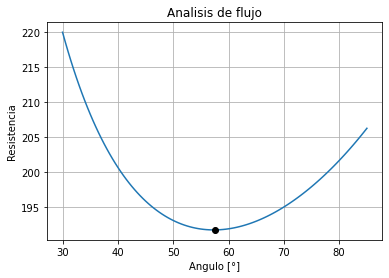

Angulo minimo: 57.5°
Punto C: 24.51718956770027 pies


In [8]:
d1, d2 = 1.75, 1.5
L1, L2 = 50, 40
r1, r2 = d1/2, d2/2
theta = np.deg2rad(np.arange(30, 85.5, 0.5))

R_K = (L1 - L2 * np.tan(theta)**-1) / (r1**4) + L2 / (r2**4 * np.sin(theta))

rk_min = np.min(R_K)
idx_min = np.argmin(R_K)
ang_min = np.rad2deg(theta[idx_min])

# Graficar los resultados
plt.plot(np.rad2deg(theta), R_K)
plt.plot(ang_min, rk_min, 'ko')
plt.title("Analisis de flujo")
plt.xlabel("Angulo [°]")
plt.ylabel("Resistencia")
plt.grid()
plt.show()

# Imprimir resultados
dist_s = L2 / np.tan(np.deg2rad(ang_min))
print(f"Angulo minimo: {ang_min:.1f}°")
print(f"Punto C: {(L1 - dist_s)} pies")

## Aplicación: cálculo
La posicion x en función del tiempo de una partícula que se mueve a lo largo de una linea recta, esta dada por:

$$x(t) = 0.41t^4 - 10.8t^3 + 64t^2 - 8.2t + 4.4$$

La velocidad v(t) de la particula es determinada por la derivada de x(t) con respecto a t, y la aceleración a(t) esta determinada por la derivada de v(t) respecto a t.

Derive las expresiones para la velocidad y la aceleración de la particula, y grafique la posicion, velocidad y aceleraci+on en función del tiempo para $0 \le t \le 8$ s. Utilize `subplot` para hacer tres subgraficas apiladas una sobre otra, donde la superior mostrará la posicion, la del medio la velocidad y la inferior la aceleración. Etiquete los ejes de forma apropiada con coordenadas rectangulares

Calculo de x, x', x''
x  : 0.41*t**4 - 10.8*t**3 + 64*t**2 + 4.4
x' : 1.64*t**3 - 32.4*t**2 + 128*t
x'': 4.92*t**2 - 64.8*t + 128


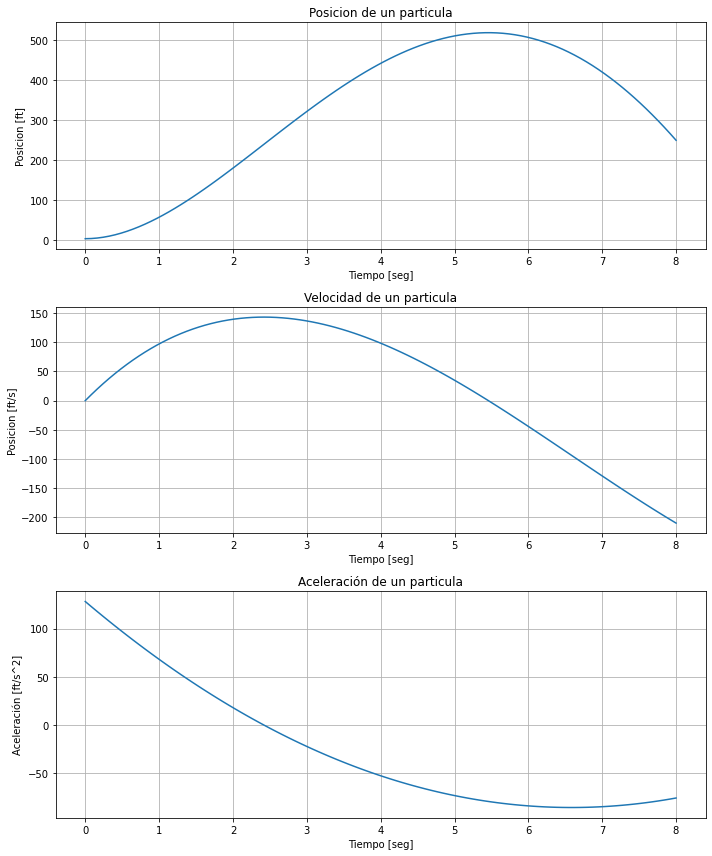

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

t = sp.Symbol('t')
x = 0.41 * t**4 - 10.8 * t**3 + 64 * t**2 + 4.4
v = sp.Derivative(x, t).doit()
a = sp.Derivative(x, t, 2).doit()

print("x  :", x)
print("x\' :", v)
print("x\'\':", a)

# sp.lambdify([symbols list], expr, 'numpy')
fx = sp.lambdify([t], x, 'numpy')
fv = sp.lambdify([t], v, 'numpy')
fa = sp.lambdify([t], a, 'numpy')

# Obtiene resultados a partir de las funciones de posicion, velocidad y aceleracion
t = np.linspace(0, 8, 100)
x = fx(t)
v = fv(t)
a = fa(t)

fig = plt.figure(figsize=(10, 12))

plt.subplot(3,1,1)
plt.plot(t, x)
plt.title("Posicion de un particula")
plt.xlabel("Tiempo [seg]")
plt.ylabel("Posicion [ft]")
plt.grid()

plt.subplot(3,1,2)
plt.plot(t, v)
plt.title("Velocidad de un particula")
plt.xlabel("Tiempo [seg]")
plt.ylabel("Posicion [ft/s]")
plt.grid()

plt.subplot(3,1,3)
plt.plot(t, a)
plt.title("Aceleración de un particula")
plt.xlabel("Tiempo [seg]")
plt.ylabel("Aceleración [ft/s^2]")
plt.grid()

plt.tight_layout()
plt.show()

## Aplicación: ingeniería eléctrica
En un circuito RLC serie con una fuente de voltaje AC, la amplitud de la corriente I esta dada por:

$$I =\frac{v_m}{\sqrt{R^2+ (\omega_dL - 1/(\omega_dC))^2}}$$

donde $\omega_d = 2 \pi f_d$, en el que $fd$ es la frecuencia de la fuente; R, C y L son la resistencia, la capacitancia y la inductancia, respectivamente; y $v_m$ es la amplitud de V. Para el circuito se tienen los siguientes valores:

R = 80 ohm, C = 18 uF, L = 260 mH y $v_m$ = 10 V

Muestre un gráfico de *I* en función de $f_d$ para $10 \le f \le 10000 Hz$. Use escala lineal para I y escala logarítmica para $f_d$

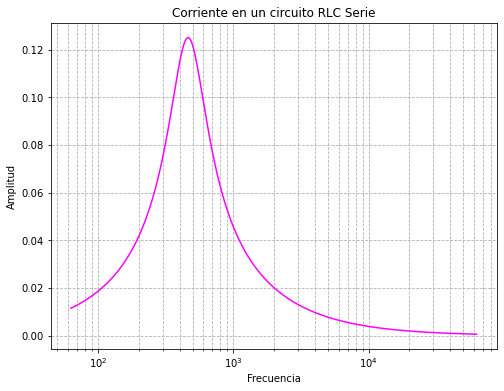

In [103]:
R = 80
C = 18e-6
L = 260e-3
vm = 10

fd = np.arange(10, 10000)
wd = 2 * np.pi * fd

I = vm / np.sqrt(R**2 + (wd * L - 1/(wd * C))**2)

plt.figure(figsize=(8, 6))
plt.semilogx(wd, I, color='magenta')
plt.title("Corriente en un circuito RLC Serie")
plt.xlabel("Frecuencia")
plt.ylabel("Amplitud")
plt.grid(linestyle='dashed', which='both')
plt.show()

## Uso de matplotlib con objetos graficos (fig, ax)
![matplotlib graph elements](https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png)

Cuando se llama a las instrucciones graficas, como `plt.title()` lo que realmente sucede tras la cortina es la inspección del gráfico (llamado _axes_) para llamar a un setter llamado `set_title`. Esta es la forma de interactuar con la librería gráfica directamente con los objetos gráficos. Esto suele ser más complejo, pero se tiene un control más fino de las propiedades de un gráfico

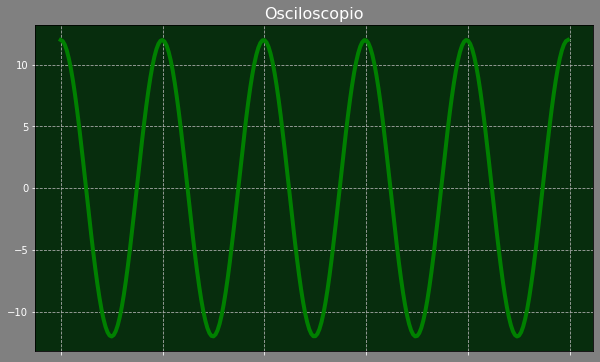

In [27]:
f = 5
t = np.linspace(0, 1, 50 * f)
y = 12 * np.cos(2 * np.pi * f * t)

fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor('gray')

ax.plot(y, color='green', linewidth=4)
ax.set_title("Osciloscopio", color='white', fontsize=16)
ax.set_facecolor("#072d0d")
ax.set_xticklabels([])
ax.tick_params(colors='white')
ax.grid(True, linestyle='--')

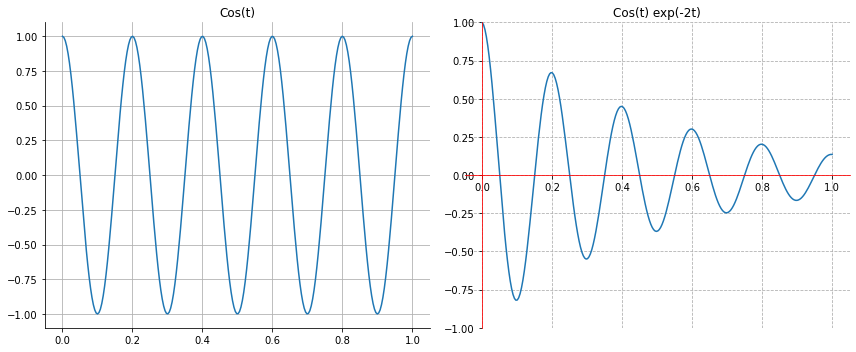

In [50]:
f = 5
t = np.linspace(0, 1, f * 50)
y1 = np.cos(2 * np.pi * f * t)
y2 = y1 * np.exp(-2 * t)

# Retorna una Figura y dos axis
fig, (ax1, ax2) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)

# line1, es el primer elemento de la lista que contiene los puntos del gráfico
line1, = ax1.plot(t, y1); ax1.set_title("Cos(t)"); ax1.grid()
line2, = ax2.plot(t, y2); ax2.set_title("Cos(t) exp(-2t)"); ax2.grid(linestyle='dashed')

# Control de los ejes coordenados (spines)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_position(('data', 0))
ax2.spines['left'].set_position(('data', 0))
ax2.spines['bottom'].set_color('red')
ax2.spines['left'].set_color('red')

ax2.set_ylim(-1, 1)

plt.tight_layout()    # pad=num ajusta el borde de forma manual
plt.show()

Hay cierta confusión inicial en la linea `line1, = ax.plot()`.El caracter `,` permite extraer el elemento inicial de la lista de elementos gráficos generados. Esto se entiende mejor cuando se generan dos gráficos sobre un mismo `plot`:

[<matplotlib.lines.Line2D object at 0x000002387FC36D30>, <matplotlib.lines.Line2D object at 0x000002387FC36D90>]


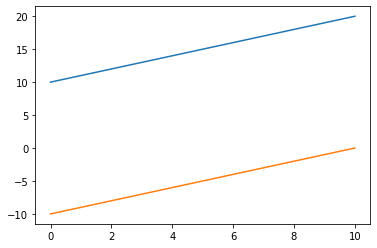

In [85]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
y1 = x + 10
y2 = x - 10

lines = ax.plot(x, y1, x, y2)
print(lines)

Como se observa, la instrucción `ax.plot` retorna una lista con los objetos `matplotlib.lines.Line2D` que en este caso son dos. Para poder tenerlos por separado:

Line2D(_line0) Line2D(_line1)


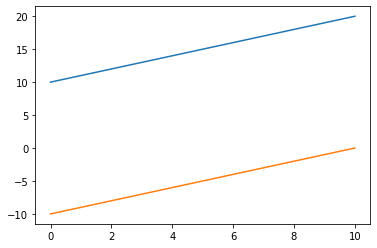

In [86]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
y1 = x + 10
y2 = x - 10

line1, line2 = ax.plot(x, y1, x, y2)
print(line1, line2)

Así, cuando se tiene un solo gráfico, la `,` se mantiene para extraer el único elemento `matplotlib.lines.Line2D`:

Line2D(_line0)


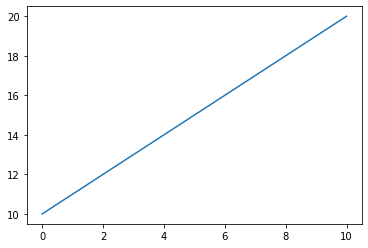

In [87]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
y = x + 10

line, = ax.plot(x, y)
print(line)

La intención de guardar el objeto `Line2D` es poder cambiar sus propiedades posteriormente sin tener que volver a graficar:

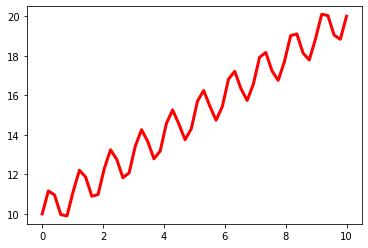

In [102]:
fig, ax = plt.subplots()

x = np.linspace(0, 10)
y = x + 10

line, = ax.plot(x, y)    # Se grafica y se almacena el objeto gráfico
line.set_linewidth(3)    # Se cambia el ancho de linea
line.set_color('red')    # Se cambia el color de la linea
line.set_ydata(y + np.sin(2 * np.pi * x))    # Se cambian los valores de las coordenadas y de la linea

## Aplicación: Procesamiento Digital de Señales
Se quiere generar un tono senoidal de 440Hz de 3 segundos de duración, utilizando una tasa de muestreo de 8kHz (número de muestras por segundo).

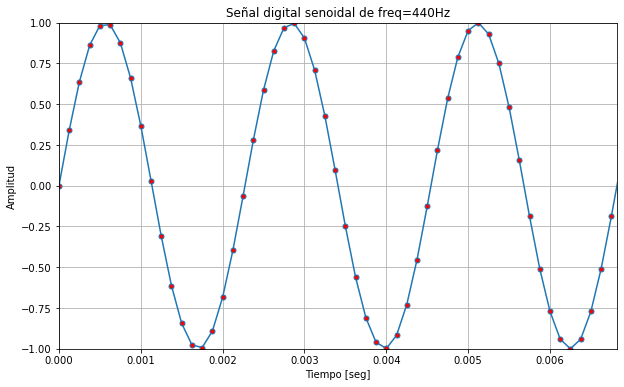

In [2]:
ff = 440
fm = 8000
tm = 1 / fm     # Periodo de muestreo
t = 3           # 3 segundos

t_vec = np.arange(0, t, tm)
y = np.sin(2 * np.pi * ff * t_vec).astype(np.float32)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t_vec, y, '-o', markersize=5, markerfacecolor='r')
ax.set_ylim(-1, 1)
ax.set_xlim(0, 3/ff)
ax.set_title(f"Señal digital senoidal de freq={ff}Hz")
ax.set_xlabel("Tiempo [seg]")
ax.set_ylabel("Amplitud")
ax.grid()

plt.show()

Para reproducir la muestra generada es necesario instalar pyAudio. Al momento de generar este documento, la librería no se encuentra disponble es los gestores de paquetes para una version de Python 3.7 o superior. Así que la instalación tendrá que recurrír a la descarga manual del paquete de instalación (archivo Wheel .whl). El paquete esta disponible es https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyaudio. Se debe de escoger el archivo segun la versión de Python y el sistema (32bits o 64 bits). Por ejemplo, para Python 3.9 en un equipo de 64 bits, el archivo sera:

    PyAudio‑0.2.11‑cp39‑cp39‑win_amd64.whl
    
Una vez descargado el archivo, hay que ir a la ruta donde ha sido guardado y instalarlo con el gestor pip:

    pip install PyAudio‑0.2.11‑cp39‑cp39‑win_amd64.whl

In [117]:
import pyaudio

def play_audio(audio_sample, rate=44100):
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paFloat32, channels=1, rate=rate, output=True)
    stream.write(audio_sample.tobytes())
    stream.close()
    p.terminate()
    

In [118]:
play_audio(y, rate=8000)

## Ejemplo de aplicación: Generación de tonos DTMF
![](https://elastixtech.com/wp-content/uploads/2013/01/Elastix-DTMF_02.gif?x84371)

In [137]:
class Tone:
    def __init__(self, amplitude=1, freq=440, duration=1, sample_rate=44100):
        self.amplitude = amplitude
        self.freq = freq
        self.duration = duration
        self.sample_rate = sample_rate
        
    def generate(self):
        t_vec = np.arange(0, self.duration, 1/self.sample_rate)
        return self.amplitude * np.sin(2 * np.pi * self.freq * t_vec).astype(np.float32)


In [138]:
class DTMF_Tone:
    def __init__(self, number, duration=1, sample_rate=44100):
        self.number = number
        self.duration = duration
        self.sample_rate = sample_rate
        self.amplitude = 1
        
    def generate(self):
        dtmf_freqs = {'1': (1209, 697), '2': (1336, 697), '3': (1477, 697), 
                      '4': (1209, 770), '5': (1336, 770), '6': (1477, 770), 
                      '7': (1209, 852), '8': (1336, 852), '9': (1477, 852), 
                      '*': (1209, 941), '0': (1336, 941), '#': (1477, 941),}
        
        if str(self.number) in dtmf_freqs:
            freq1, freq2 = dtmf_freqs.get(self.number)
            return (Tone(self.amplitude, freq1, self.duration, self.sample_rate).generate() + 
                    Tone(self.amplitude, freq2, self.duration, self.sample_rate).generate()) / 2
        
    def play_audio(self):
        p = pyaudio.PyAudio()
        stream = p.open(format=pyaudio.paFloat32, channels=1, rate=self.sample_rate, output=True)
        stream.write(self.generate().tobytes())
        stream.close()
        p.terminate()

In [140]:
dtmf = DTMF_Tone('0')
dtmf.play_audio()

## Análisis de un tono DTMF en frecuencia (FFT)

In [142]:
from scipy import fft as spfft

dialed_digit = '9'
dtmf = DTMF_Tone(dialed_digit).generate()
fft_sample = spfft.fft(dtmf)

print("Numero de puntos:", fft_sample.size)
print(fft_sample)
print()
print("Primer punto:", fft_sample[0])
print("Segundo y ultimo punto:", fft_sample[1], fft_sample[-1])
print("Tercer y penultimo punto:", fft_sample[2], fft_sample[-2])

Numero de puntos: 44100
[-1.4901161e-07-0.0000000e+00j -1.7690307e-06+4.9827772e-06j
  3.2151775e-06+7.2622033e-06j ...  4.7452913e-06+3.3977042e-06j
  3.2151775e-06-7.2622033e-06j -1.7690307e-06-4.9827772e-06j]

Primer punto: (-1.4901161e-07-0j)
Segundo y ultimo punto: (-1.7690307e-06+4.982777e-06j) (-1.7690307e-06-4.982777e-06j)
Tercer y penultimo punto: (3.2151775e-06+7.2622033e-06j) (3.2151775e-06-7.2622033e-06j)


In [143]:
amp_freq = np.abs(fft_sample[0:fft_sample.size//2]) / fft_sample.size   # Estandarizar (numero de muestras)
amp_freq

array([3.3789482e-12, 1.1989770e-10, 1.8009298e-10, ..., 1.0059316e-10,
       1.6147868e-10, 4.0748974e-11], dtype=float32)

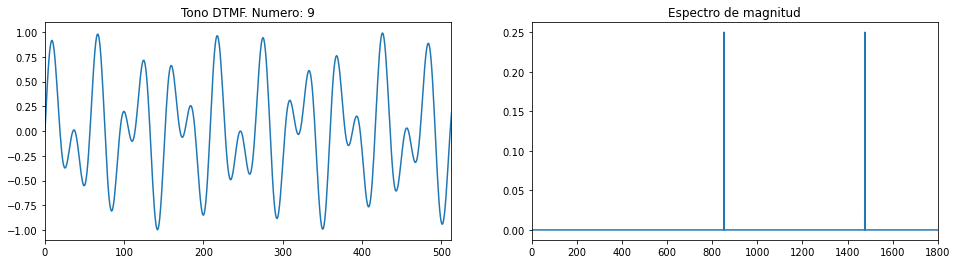

In [146]:
fig, (ax1, ax2) = plt.subplots(figsize=(16, 4), nrows=1, ncols=2)

ax1.plot(dtmf)
ax1.set_title(f"Tono DTMF. Numero: {dialed_digit}")
ax1.set_xlim(0, 512)

ax2.plot(amp_freq)
ax2.set_title("Espectro de magnitud")
ax2.set_xlim(0, 1800)

plt.show()

## Audio en tiempo real
En caso la fuente de audio no sea reconocida, será necesario especificarla en el código con la propiedad `input_device_index` al abrir el flujo de audio con `p.open()`. Se muestra el código que lista los indices de los dispositivos de audio.

In [147]:
# Deteccion de las fuentes de audio
p = pyaudio.PyAudio()
for i in range(p.get_device_count()):
    dev = p.get_device_info_by_index(i)
    print((i,dev['name'],dev['maxInputChannels']))

(0, 'Asignador de sonido Microsoft - Input', 2)
(1, 'Microphone Array (AMD Audio Dev', 2)
(2, 'Asignador de sonido Microsoft - Output', 0)
(3, 'Speakers (Realtek(R) Audio)', 0)
(4, 'Controlador primario de captura de sonido', 2)
(5, 'Microphone Array (AMD Audio Device)', 2)
(6, 'Controlador primario de sonido', 0)
(7, 'Speakers (Realtek(R) Audio)', 0)
(8, 'Realtek ASIO', 2)
(9, 'Speakers (Realtek(R) Audio)', 0)
(10, 'Microphone Array (AMD Audio Device)', 2)
(11, 'Micrófono (Realtek HD Audio Mic input)', 2)
(12, 'Headphones (Realtek HD Audio 2nd output)', 0)
(13, 'Mezcla estéreo (Realtek HD Audio Stereo input)', 2)
(14, 'Speakers 1 (Realtek HD Audio output with HAP)', 0)
(15, 'Speakers 2 (Realtek HD Audio output with HAP)', 0)
(16, 'Altavoz de PC (Realtek HD Audio output with HAP)', 2)
(17, 'Microphone Array 1 (AMDAfdInstall Wave Microphone - 0)', 2)
(18, 'Microphone Array 2 (AMDAfdInstall Wave Microphone - 0)', 1)


Vamos a capturar tramas de audio con pyaudio y las graficamos en tiempo real fácilmente con muy pocas líneas de procesamiento gráfico ya que los gráficos son objetos que pueden ser manipulados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
from tkinter import TclError
import wave
%matplotlib tk

CHUNK = 1024
FORMAT = pyaudio.paInt16
RATE = 8192
CHANNELS = 1
MAX_AMPLITUDE = 2**15//2 - 1
#INPUT_DEVICE_INDEX = 1         # Ajustar segun las fuentes de audio
FILENAME = "recording.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT, rate=RATE, channels=CHANNELS, 
                input=True, output=False, frames_per_buffer=CHUNK)
                #input_device_index = INPUT_DEVICE_INDEX)

fig, ax = plt.subplots()   # Ventana Externa (%matplotlib tk)

x = np.arange(0, CHUNK)
line, = ax.plot(x, np.random.uniform(0, 0.1, CHUNK))
ax.set_xlim(0, CHUNK)
ax.set_ylim(-MAX_AMPLITUDE, MAX_AMPLITUDE)
ax.set_title(f"Audio en tiempo real fm={RATE:,}Hz")
ax.tick_params(labelbottom = False, bottom = False)
ax.grid()

frames = []
stream.start_stream()

while True:
    try:
        audio_in = stream.read(CHUNK)
        data_in = np.frombuffer(audio_in, dtype=np.int16)
        
        frames.append(audio_in)
                
        line.set_ydata(data_in)
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    except TclError:
        stream.stop_stream()
        stream.close()
        p.terminate()
        break
        
# Para guardar la muestra de audio
# Referencia: https://docs.python.org/3/library/wave.html
print(f"Guardando audio en archivo {FILENAME}... ", end='')
wf = wave.open(FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()
print("Hecho.")

Guardando audio en archivo recording.wav... Hecho.


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel\eventloops.py:256: RuntimeWarning: coroutine 'Kernel.do_one_iteration' was never awaited
  self.func()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
from tkinter import TclError
from scipy import fft as spfft
%matplotlib tk

CHUNK = 512
FORMAT = pyaudio.paInt16
RATE = 8192
CHANNELS = 1
MAX_AMPLITUDE = 2**15//2 - 1
#INPUT_DEVICE_INDEX = 2        # Ajustar segun las fuentes de audio

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT, rate=RATE, channels=CHANNELS, 
                input=True, output=False, frames_per_buffer=CHUNK) 
                #input_device_index = INPUT_DEVICE_INDEX)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)   # Ventana Externa (%matplotlib tk)

x = np.arange(0, CHUNK)
line1, = ax1.plot(x, np.random.uniform(0, 0.1, CHUNK))
ax1.set_xlim(0, CHUNK)
ax1.set_ylim(-MAX_AMPLITUDE, MAX_AMPLITUDE)
ax1.set_title(f"Audio en tiempo real fm={RATE:,}Hz")
ax1.tick_params(labelbottom = False, bottom = False)
ax1.grid()

line2, = ax2.plot(np.zeros(CHUNK//2), color='orange')
ax2.set_ylim(0, CHUNK)
ax2.set_title(f"Espectro de la señal")
ax2.grid()             

plt.tight_layout()

while True:
    try:
        audio_in = stream.read(CHUNK)
        data_in = np.frombuffer(audio_in, dtype=np.int16)

        fft_sample = spfft.fft(data_in)
        amp_freq = np.abs(fft_sample[0: fft_sample.size//2]) / fft_sample.size
       
        line1.set_ydata(data_in)
        line2.set_ydata(amp_freq)
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    except TclError:
        stream.close()
        p.terminate()
        break


C:\Users\Asus\anaconda3\lib\site-packages\ipykernel\eventloops.py:256: RuntimeWarning: coroutine 'Kernel.do_one_iteration' was never awaited
  self.func()
